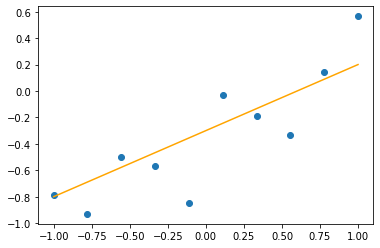

In [ ]:
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
import numpy as np
import seaborn as sns
import random 
 
intercept=-0.3
slope=0.5

x=np.linspace(-1,1,10)
def dataset():
    y=slope*x+intercept
    t=y+np.random.normal(0,0.2,10)
    return t
points=dataset()
plt.scatter(x, points)
plt.plot(x, slope * x + intercept, c="orange")



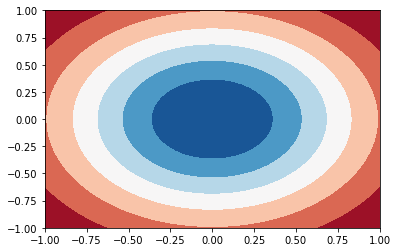

In [ ]:
def line(x, w0, w1):
    return w0 + w1*x
    
def probability(y, x, w0, w1):
    k = math.sqrt(np.pi * 2) * 0.2
    p=k * np.exp(-0.5 * ((y - line(x, w0, w1))/0.2) ** 2)
    return p;

w0, w1 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
grid_w0 = norm.pdf(w0, 0, math.sqrt(0.5))
grid_w1 = norm.pdf(w1, 0, math.sqrt(0.5))
prior_grid = grid_w0 * grid_w1
plt.contourf(w0, w1, prior_grid, cmap="RdBu")

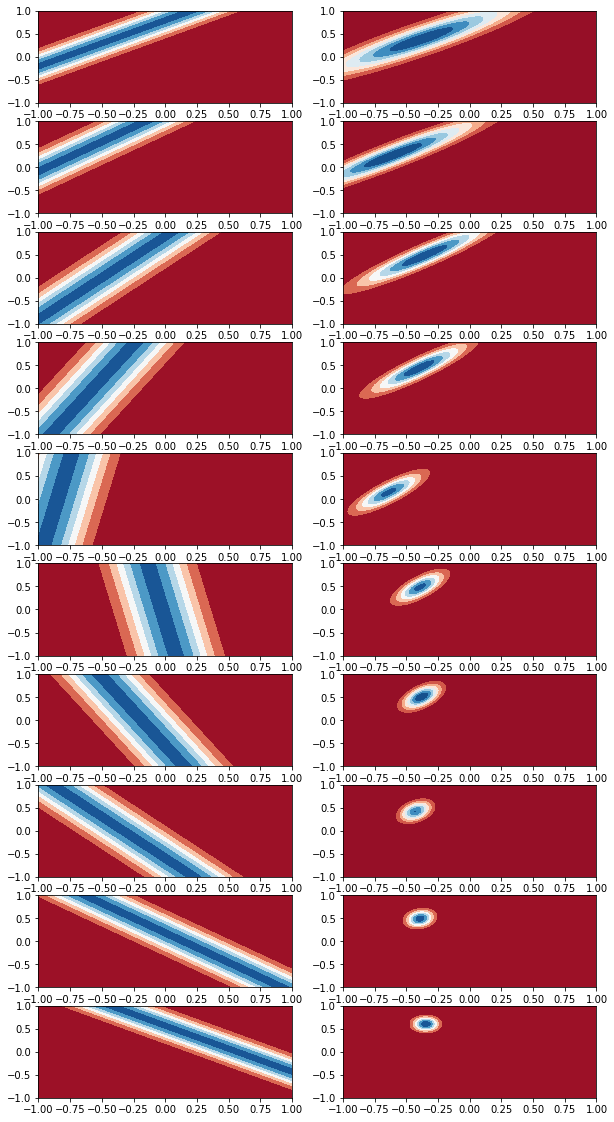

In [ ]:

fig, axes =plt.subplots(10, 2, figsize=(10, 20))
count = 0
for i, j in zip(x, points):
    likelihood = probability(j, i, w0, w1)
    posterior = prior_grid * likelihood
    prior_grid = posterior
    axes[count, 0].contourf(w0, w1, likelihood, cmap="RdBu")
    axes[count, 1].contourf(w0, w1, posterior, cmap="RdBu")
    count = count+1

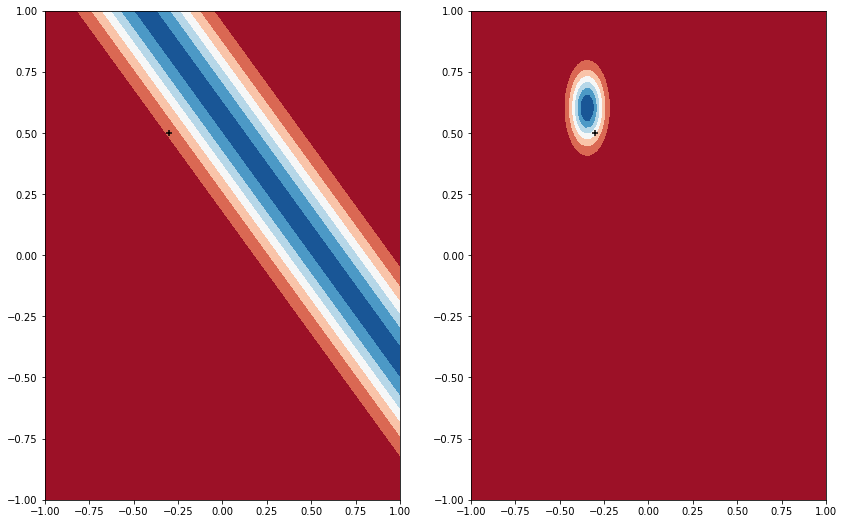

In [ ]:

fig1, axes1 = plt.subplots(1, 2, figsize=(14, 9))
axes1[0].contourf(w0, w1, likelihood, cmap="RdBu")
axes1[0].scatter(-0.3, 0.5, c="black", marker="+")
axes1[1].contourf(w0, w1, posterior, cmap="RdBu")
axes1[1].scatter(-0.3, 0.5, c="black", marker="+")